<a href="https://colab.research.google.com/github/TaranSchlich/Healthcare-Ad-Spend-Analysis-UW-Madison-MSDIA/blob/main/GB881_Assignment_6_Schlichtmann_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Ad Spend Analysis

By: Taran Schlichtmann

### Importing Libraries

In [ ]:
# Libraries for data analysis, manipulation, visualization, and statistical analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Dataframe

In [ ]:
# loading dataset into dataframe

URL_Ad_Spend = 'http://bit.ly/ad_spend'

Dataframe_Ad_Spend = pd.read_csv(URL_Ad_Spend)

### Dimensions of Dataset

In [ ]:
# Determing the number of rows in the dataset

Dataframe_Ad_Spend.shape[0]

200

### Columns and Data Types

In [ ]:
# Identifying columns and determing datatypes

Dataframe_Ad_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Number Conversions within Dataset

In [ ]:
# Changing columns containing advertising costs from tens of thousands of dollars to millions of dollars to match the unit for sales and keep records conisistent

Dataframe_Ad_Spend['TV'] = Dataframe_Ad_Spend['TV'] / 100
Dataframe_Ad_Spend['radio'] = Dataframe_Ad_Spend['radio'] / 100
Dataframe_Ad_Spend['newspaper'] = Dataframe_Ad_Spend['newspaper'] / 100

### Data Preview

In [ ]:
# Previewing first few records to understand what the data looks like

Dataframe_Ad_Spend.head(8)

,TV,radio,newspaper,sales
0,2.301,0.378,0.692,22.1
1,0.445,0.393,0.451,10.4
2,0.172,0.459,0.693,9.3
3,1.515,0.413,0.585,18.5
4,1.808,0.108,0.584,12.9
5,0.087,0.489,0.750,7.2
6,0.575,0.328,0.235,11.8
7,1.202,0.196,0.116,13.2


### Descriptive Statistics

In [ ]:
# Generating descriptive statistics for the numeric columns in the dataset

Dataframe_Ad_Spend.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,1.470425,0.232640,0.305540,14.022500
std,0.858542,0.148468,0.217786,5.217457
min,0.007000,0.000000,0.003000,1.600000
25%,0.743750,0.099750,0.127500,10.375000
50%,1.497500,0.229000,0.257500,12.900000
75%,2.188250,0.365250,0.451000,17.400000
max,2.964000,0.496000,1.140000,27.000000


### Histogram

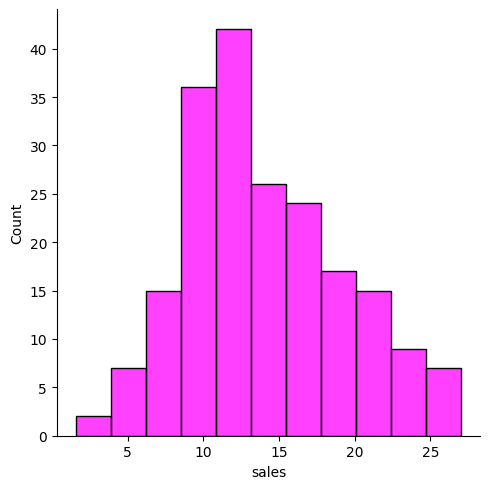

In [ ]:
# A histogram visualizing the distribution of data in the sales column

sns.displot(data=Dataframe_Ad_Spend, x='sales', color='fuchsia')

### Creating New Columns

In [ ]:
# Adding a new column 'total_ad_spend' that sums 'TV', 'radio', and 'newspaper' columns.
# Creating a new column 'roi_percent' to calculate ROI (return on investment) of marketing investments
# Note RoI % = [(Sales Growth - Marketing Cost) / Marketing Cost] * 100
# Assuming the 'sales' field represents sales growth

Dataframe_Ad_Spend['total_ad_spend'] = Dataframe_Ad_Spend['TV'] + Dataframe_Ad_Spend['radio'] + Dataframe_Ad_Spend['newspaper']
Dataframe_Ad_Spend['roi_percent'] = ((Dataframe_Ad_Spend['sales'] - Dataframe_Ad_Spend['total_ad_spend']) / Dataframe_Ad_Spend['total_ad_spend']) * 100

### Data Preview

In [ ]:
# Previewing the dataset to verify columns were made as intended

Dataframe_Ad_Spend.head(8)

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
0,2.301,0.378,0.692,22.1,3.371,555.591813
1,0.445,0.393,0.451,10.4,1.289,706.826998
2,0.172,0.459,0.693,9.3,1.324,602.416918
3,1.515,0.413,0.585,18.5,2.513,636.171906
4,1.808,0.108,0.584,12.9,2.500,416.000000
5,0.087,0.489,0.750,7.2,1.326,442.986425
6,0.575,0.328,0.235,11.8,1.138,936.906854
7,1.202,0.196,0.116,13.2,1.514,771.862616


### Scatterplot

Text(0, 0.5, 'Sales')

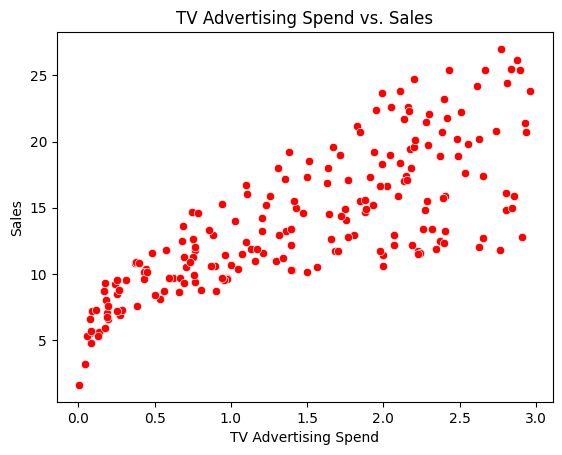

In [ ]:
# Visualizing a scatterplot to show the relationship between TV advertising spend and sales

sns.scatterplot(data=Dataframe_Ad_Spend, x='TV', y='sales', color='red')
plt.title('TV Advertising Spend vs. Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')

### Pairplot

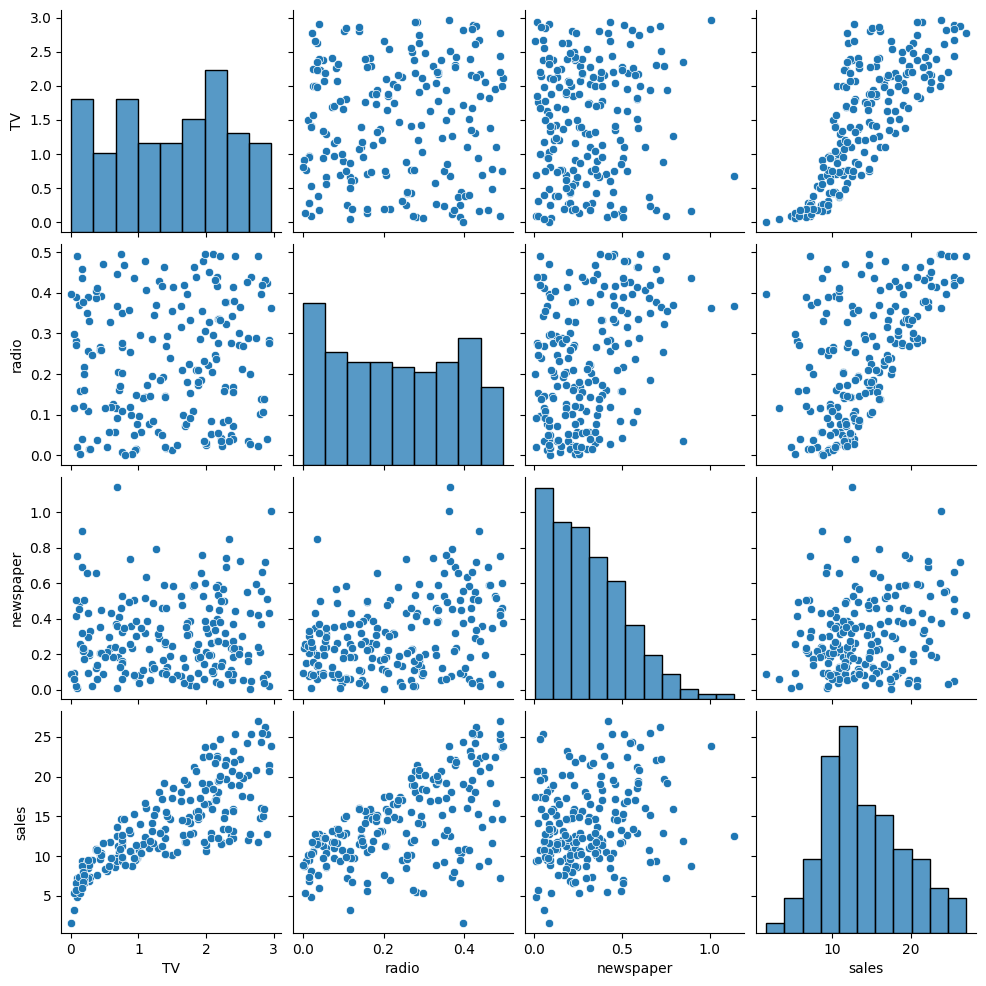

In [ ]:
# Creating a pairplot to show relationships between all of the fields, except 'total_ad_spend' and 'roi_percent'

sns.pairplot(Dataframe_Ad_Spend.iloc[:, [0, 1, 2, 3]])

### Correlation Matrix

In [ ]:
# Generating a correlation matrix that includes the correlation coefficients for all columns

Dataframe_Ad_Spend.corr()

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
TV,1.000000,0.054809,0.056648,0.782224,0.945330,-0.557013
radio,0.054809,1.000000,0.354104,0.576223,0.293211,-0.016154
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059,-0.310481
sales,0.782224,0.576223,0.228299,1.000000,0.867712,-0.338714
total_ad_spend,0.945330,0.293211,0.343059,0.867712,1.000000,-0.589595
roi_percent,-0.557013,-0.016154,-0.310481,-0.338714,-0.589595,1.000000


### Model Preparation

#### Dropping Null Values

In [ ]:
# Dropping any rows with null values
# Fitting the prediction model using the training data based on individual advertising spend. Excluding 'total_ad_spend' and 'roi_percent' and only including individual spend fields with a correlation coefficient for sales greater than 0.5 or less than -0.5

Dataframe_Ad_Spend.dropna
Dataframe_Ad_Spend.isnull().sum()


,0
TV,0
radio,0
newspaper,0
sales,0
total_ad_spend,0
roi_percent,0


#### Separating Variables

In [ ]:
# Separating data into independant variable (X) and dependant variable (Y)

X = Dataframe_Ad_Spend [['TV', 'radio']]
Y = Dataframe_Ad_Spend ['sales']

#### Test Dataset

In [ ]:
# Splitting the data into a training set (75% of data) and a test set (25% of data), and setting random_state to zero

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#### Model Training

In [ ]:
# Fitting the prediction model using the training data based on individual advertising spend.
# Excluding 'total_ad_spend' and 'roi_percent' and only including individual spend fields with a correlation coefficient for sales greater than 0.5 or less than -0.5

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

#### Y-Intercept and Coeffecients of Regression Model

In [ ]:
# Displaying the Y-Intercept and coeffecients of regression model
# y = mx + b
# Determing coefficient for the 'radio' variable within the regression equation

print(model.intercept_)
print(model.coef_)


2.9109237322037913
[ 4.41972877 19.94695311]


#### Predicted Sales

In [ ]:
# Predicting the sales of TV and radio ad spend at $500,000 or 0.5 million

new_X = [[0.5, 0.5]]
model.predict(new_X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.09426467])

#### Predictions in Test Data

In [ ]:
# Making predictions in test data

Y_pred = model.predict(X_test)

#### Performance

In [ ]:
# Evaluating the performance of the model (r-squared)

metrics.r2_score(Y_test, Y_pred)

0.8580883042722334

#### Summary

This analysis evaluates the impact of advertising spend on sales for a healthcare company. Using Python to explore data from TV, radio, and newspaper ads, performed correlation analysis, and built a linear regression model. Results show TV and radio spend strongly predict sales (R² ≈ 0.86), while newspaper has minimal effect. Visualizations and ROI calculations provide actionable insights for optimizing marketing investments.